In [1]:
# https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-s

# Numpy date and time documentation
# https://numpy.org/doc/stable/reference/arrays.datetime.html

* Time stamps reference particular moments in time (e.g., July 4th, 2015 at 7:00am).
* Time intervals and periods reference a length of time between a particular beginning and end point; for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).
* Time deltas or durations reference an exact length of time (e.g., a duration of 22.56 seconds).

* Use python builtin **datetime** and 3rd party **dateutil**

In [3]:
# datetime
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [4]:
# dateutil
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [5]:
# Now that have datetime object, can do things like print day of week etc
date.strftime('%A')

'Saturday'

#### Numpy
Just as lists of Python numerical variables are suboptimal compared to NumPy-style typed numerical arrays, lists of Python datetime objects are suboptimal compared to typed arrays of encoded dates.

Once we have this date formatted, however, we can quickly do vectorized operations on it

In [6]:
# numpy date64
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [7]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

One detail of the datetime64 and timedelta64 objects is that they are built on a fundamental time unit. Because the datetime64 object is limited to 64-bit precision, the range of encodable times is 264 times this fundamental unit. In other words, datetime64 imposes a trade-off between time resolution and maximum time span.

For example, if you want a time resolution of one nanosecond, you only have enough information to encode a range of 264 nanoseconds, or just under 600 years. NumPy will infer the desired unit from the input; for example, here is a day-based datetime


In [8]:
# day based time datetime
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [9]:
# minute based
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [10]:
# You can force any desired fundamental unit using one of many format codes; for example, here we'll force a nanosecond-based time
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [ ]:
# SEE DOCUMENTATION (LINKED AT TOP NUMPY) FOR CODE MEANING 

#### Pandas
Builds on all of above.

Pandas builds upon all the tools just discussed to provide a Timestamp object, which combines the ease-of-use of datetime and dateutil with the efficient storage and vectorized interface of numpy.datetime64. From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

In [11]:
# String format to day of week
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [12]:
date.strftime('%A')

'Saturday'

In [13]:
# numpy-style vectorized operations
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandas Time Serries: Indexing by Time

In [14]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

Now that we have this data in a Series, we can make use of any of the Series indexing patterns we discussed in previous sections, passing values that can be coerced into dates:

In [15]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [16]:
# Special date-only indexing operations, such as passing in a year to obtain slice of all data from that year
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

# Pandas Time Series Data Structures 

* For time stamps, Pandas provides the Timestamp type. As mentioned before, it is essentially a replacement for Python's native datetime, but is based on the more efficient numpy.datetime64 data type. The associated Index structure is DatetimeIndex.
* For time Periods, Pandas provides the Period type. This encodes a fixed-frequency interval based on numpy.datetime64. The associated index structure is PeriodIndex.
* For time deltas or durations, Pandas provides the Timedelta type. Timedelta is a more efficient replacement for Python's native datetime.timedelta type, and is based on numpy.timedelta64. The associated index structure is TimedeltaIndex.

The most fundamental of these date/time objects are the Timestamp and DatetimeIndex objects. While these class objects can be invoked directly, it is more common to use the pd.to_datetime() function, which can parse a wide variety of formats. Passing a single date to pd.to_datetime() yields a Timestamp; passing a series of dates by default yields a DatetimeIndex:

In [18]:
# any of these types are converted
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Any DatetimeIndex can be converted to a PeriodIndex with the to_period() function with the addition of a frequency code; here we'll use 'D' to indicate daily frequency:

In [19]:
#  converte datetimeindex to period index (D is for daily)
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [20]:
# A TimedeltaIndex is created, for example, when a date is subtracted from another
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

## Regular sequences: pd.date_range()
To make the creation of regular date sequences more convenient, Pandas offers a few functions for this purpose: 
* pd.date_range() for timestamps, 
* pd.period_range() for periods, and 
* pd.timedelta_range() for time deltas.

We've seen that Python's range() and NumPy's np.arange() turn a startpoint, endpoint, and optional stepsize into a sequence. Similarly, pd.date_range() accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates. By default, the frequency is one day

In [21]:
# Create a range - with dates
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [22]:
# Create a range with periods
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [23]:
# The spacing can be modified by altering the freq argument, which defaults to D
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

To create regular sequences of Period or Timedelta values, the very similar pd.period_range() and pd.timedelta_range() functions are useful. Here are some monthly periods

In [24]:
# Here are some monthly periods:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [25]:
# And a sequence of durations increasing by an hour:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

# Frequencies and Offsets
Just as we saw the D (day) and H (hour) codes above, we can use such codes to specify any desired frequency spacing

D	Calendar day	
W	Weekly		
M	Month end	
Q	Quarter end	
A	Year end	
H	Hours	
T	Minutes		
S	Seconds		
L	Milliseonds		
U	Microseconds		
N	nanoseconds		
B	Business day		
BM	Business month end		
BQ	Business quarter end		
BA	Business year end		
BH	Business hours		

The monthly, quarterly, and annual frequencies are all marked at the end of the specified period. By adding an S suffix to any of these, they instead will be marked at the beginning


Code	Description		Code	Description		
MS	Month start		
BMS	Business month start		
QS	Quarter start		
BQS	Business quarter start		
AS	Year start		
BAS	Business year start		

Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:

Q-JAN, BQ-FEB, QS-MAR, BQS-APR, etc.
A-JAN, BA-FEB, AS-MAR, BAS-APR, etc.
In the same way, the split-point of the weekly frequency can be modified by adding a three-letter weekday code:

W-SUN, W-MON, W-TUE, W-WED, etc.
On top of this, codes can be combined with numbers to specify other frequencies. For example, for a frequency of 2 hours 30 minutes, we can combine the hour (H) and minute (T) codes as follows:

In [26]:
# frequency of 2 hours 30 minutes, we can combine the hour (H) and minute (T) codes as follows:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

All of these short codes refer to specific instances of Pandas time series offsets, which can be found in the pd.tseries.offsets module

In [31]:
# we can create a business day offset directly as follows:
pd.date_range('2015-07-01', periods=5, freq='B')

# SEE DOC FOR MORE
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

# Resampling, Shifting, and Windowing

sing some stock price data as an example. Because Pandas was developed largely in a finance context, it includes some very specific tools for financial data. For example, the accompanying pandas-datareader package (installable via conda install pandas-datareader), knows how to import financial data from a number of available sources, including Yahoo finance, Google Finance, and others. Here we will load Google's closing price history:

In [1]:
# Closing price history
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [2]:
# for simplicity, we'll use just the closing price:
goog = goog['Close']

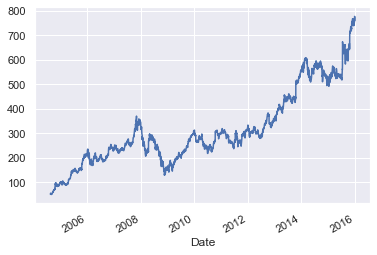

In [3]:
# Visualize 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

goog.plot();

## Resampling and converting frequencies

One common need for time series data is resampling at a higher or lower frequency. This can be done using the **resample()** method, or the much simpler **asfreq()** method. The primary difference between the two is that 
* resample() is fundamentally a data aggregation, while 
* asfreq() is fundamentally a data selection.

#### Downsampling

Taking a look at the Google closing price, let's compare what the two return when we down-sample the data. Here we will resample the data at the end of business year:

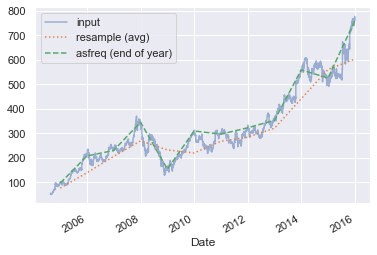

In [5]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample (avg)', 'asfreq (end of year)'],
           loc='upper left');

# Notice the difference: at each point, 
# resample reports the average of the previous year, 
# while asfreq reports the value at the end of the year.

#### Upsampling
For up-sampling, resample() and asfreq() are largely equivalent, though resample has many more options available.

In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with NA values. Just as with the pd.fillna() function discussed previously, asfreq() accepts a method argument to specify how values are imputed. Here, we will resample the business day data at a daily frequency (i.e., including weekends):

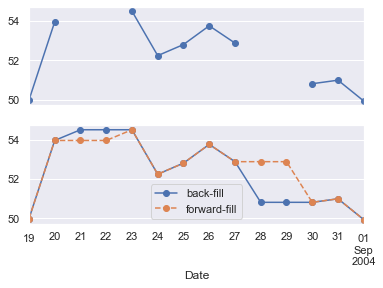

In [6]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

# top is default
# bottom ff or bf

## Time-shifts
Pandas has two closely related methods for computing this: **shift()** and **tshift()**. In short, the difference between them is that 
* shift() shifts the data, while 
*tshift() shifts the index.

In both cases, the shift is specified in multiples of the frequency.

/var/folders/q4/f3xj1m3j2h3fl1lc7921wysh0000gn/T/ipykernel_36732/681080470.py:10: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


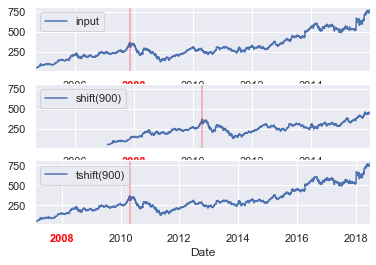

In [8]:
import pandas as pd
# Here we will both shift() and tshift() by 900 days;
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');



We see here that shift(900) shifts the data by 900 days, pushing some of it off the end of the graph (and leaving NA values at the other end), while tshift(900) shifts the index values by 900 days.

A common context for this type of shift is in computing differences over time. For example, we use shifted values to compute the one-year return on investment for Google stock over the course of the dataset:

/var/folders/q4/f3xj1m3j2h3fl1lc7921wysh0000gn/T/ipykernel_36732/2632432407.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (goog.tshift(-365) / goog - 1)


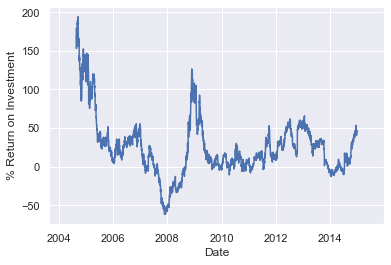

In [9]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

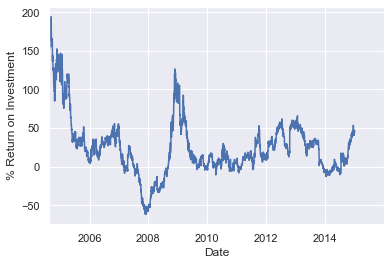

In [10]:
# heading warngin
ROI = 100 * (goog.shift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

This helps us to see the overall trend in Google stock: thus far, the most profitable times to invest in Google have been (unsurprisingly, in retrospect) shortly after its IPO, and in the middle of the 2009 recession

## Rolling Windows

Rolling statistics are a third type of time series-specific operation implemented by Pandas. These can be accomplished via the **rolling()** attribute of Series and DataFrame objects, which returns a view similar to what we saw with the groupby operation (see Aggregation and Grouping). This rolling view makes available a number of aggregation operations by default.

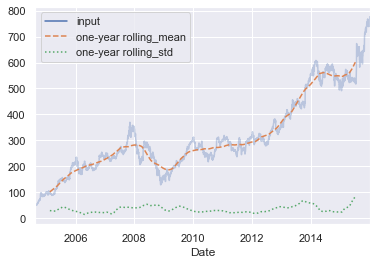

In [11]:
# For example, here is the one-year centered rolling mean and standard deviation of the Google stock prices
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

As with group-by operations, the **aggregate()** and **apply()** methods can be used for custom rolling computations.

# Example: Visualizing Seattle Bicycle Counts
As a more involved example of working with some time series data, let's take a look at bicycle counts on Seattle's Fremont Bridge. This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge. The hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the direct link to the dataset.



In [ ]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [12]:
data = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [14]:
# For convenience, we'll further process this dataset by shortening the column names and adding a "Total" column:
# data.columns = [''West', 'East']
# data['Total'] = data.eval('West + East')
data.columns = ['Total','East', 'West']

In [15]:
data.dropna().describe()

,Total,East,West
count,144352.000000,144352.000000,144352.000000
mean,111.188013,50.529241,60.658772
std,141.260941,65.050403,87.812023
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,146.000000,68.000000,75.000000
max,1097.000000,698.000000,850.000000


## Visualizing the data
We can gain some insight into the dataset by visualizing it. Let's start by plotting the raw data

In [16]:
%matplotlib inline
import seaborn; seaborn.set()

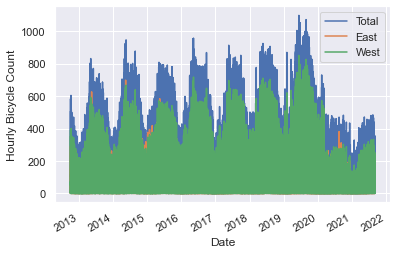

In [17]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

The ~25,000 hourly samples are far too dense for us to make much sense of. We can gain more insight by resampling the data to a coarser grid. Let's resample by week:

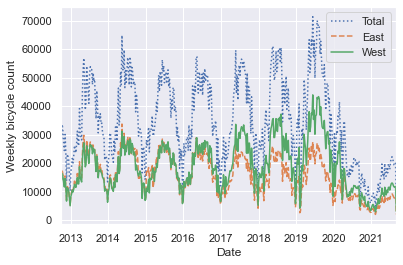

In [18]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week (likely dependent on weather; see In Depth: Linear Regression where we explore this further).

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the pd.rolling_mean() function. Here we'll do a 30 day rolling mean of our data, making sure to center the window:

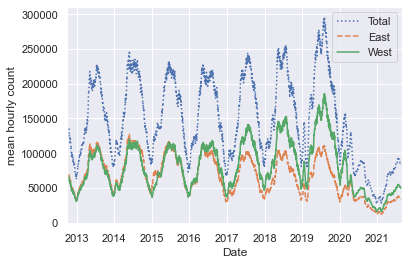

In [19]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

The jaggedness of the result is due to the hard cutoff of the window. We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window. The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

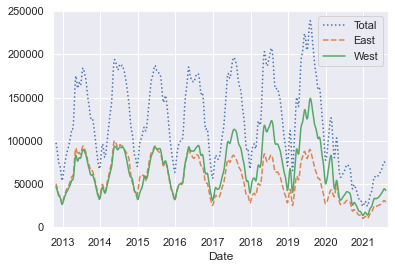

In [20]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);


## Digging into the data
While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure. For example, we might want to look at the average traffic as a function of the time of day. We can do this using the GroupBy functionality discussed in Aggregation and Grouping:

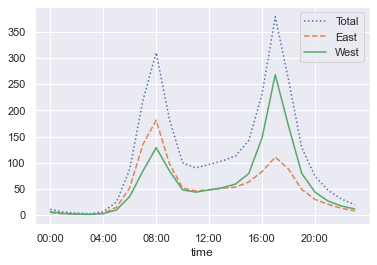

In [22]:
import numpy as np

by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening. This is likely evidence of a strong component of commuter traffic crossing the bridge. This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We also might be curious about how things change based on the day of the week. Again, we can do this with a simple groupby:

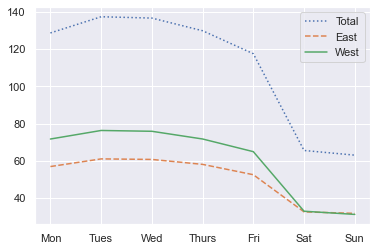

In [23]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends. We'll start by grouping by both a flag marking the weekend, and the time of day:

In [24]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

AttributeError: 'DataFrame' object has no attribute 'ix'

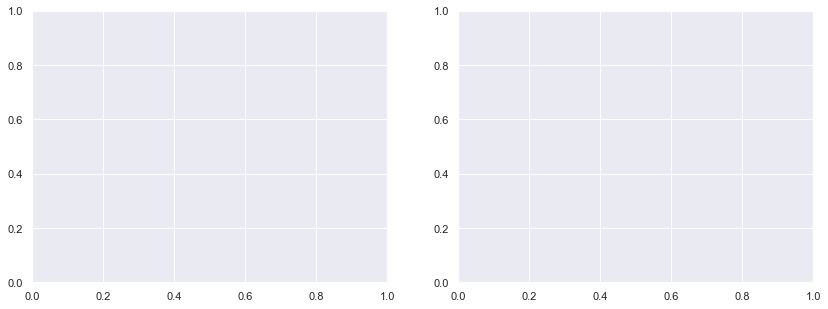

In [30]:
# use multiple subplots to view side by side
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

he result is very interesting: we see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends. It would be interesting to dig through this data in more detail, and examine the effect of weather, temperature, time of year, and other factors on people's commuting patterns; for further discussion, see my blog post "Is Seattle Really Seeing an Uptick In Cycling?", which uses a subset of this data. We will also revisit this dataset in the context of modeling in In Depth: Linear Regression.